In [99]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/corona-virus-report/covid_19_clean_complete.csv
/kaggle/input/corona-virus-report/country_wise_latest.csv
/kaggle/input/corona-virus-report/day_wise.csv
/kaggle/input/corona-virus-report/usa_county_wise.csv
/kaggle/input/corona-virus-report/worldometer_data.csv
/kaggle/input/corona-virus-report/full_grouped.csv


In [100]:
df=pd.read_csv("/kaggle/input/corona-virus-report/worldometer_data.csv")
df.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa


**Data Cleaning** 

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country/Region    209 non-null    object 
 1   Continent         208 non-null    object 
 2   Population        208 non-null    float64
 3   TotalCases        209 non-null    int64  
 4   NewCases          4 non-null      float64
 5   TotalDeaths       188 non-null    float64
 6   NewDeaths         3 non-null      float64
 7   TotalRecovered    205 non-null    float64
 8   NewRecovered      3 non-null      float64
 9   ActiveCases       205 non-null    float64
 10  Serious,Critical  122 non-null    float64
 11  Tot Cases/1M pop  208 non-null    float64
 12  Deaths/1M pop     187 non-null    float64
 13  TotalTests        191 non-null    float64
 14  Tests/1M pop      191 non-null    float64
 15  WHO Region        184 non-null    object 
dtypes: float64(12), int64(1), object(3)
memory u

In [102]:
import os

In [103]:
df.isnull().sum()

Country/Region        0
Continent             1
Population            1
TotalCases            0
NewCases            205
TotalDeaths          21
NewDeaths           206
TotalRecovered        4
NewRecovered        206
ActiveCases           4
Serious,Critical     87
Tot Cases/1M pop      1
Deaths/1M pop        22
TotalTests           18
Tests/1M pop         18
WHO Region           25
dtype: int64

In [104]:
df.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa


**Univariate Analysis**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


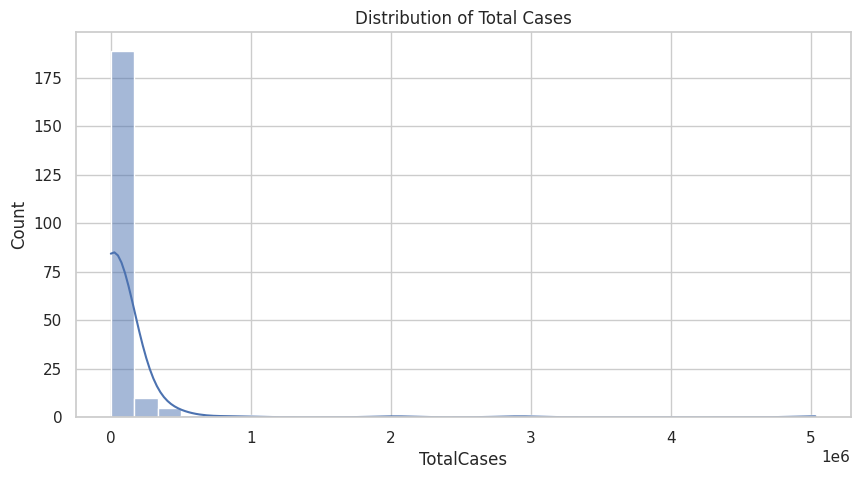

In [105]:
plt.figure(figsize=(10, 5))
sns.histplot(df['TotalCases'], bins=30, kde=True)
plt.title('Distribution of Total Cases')
plt.show()

**Bivariate Analysis**

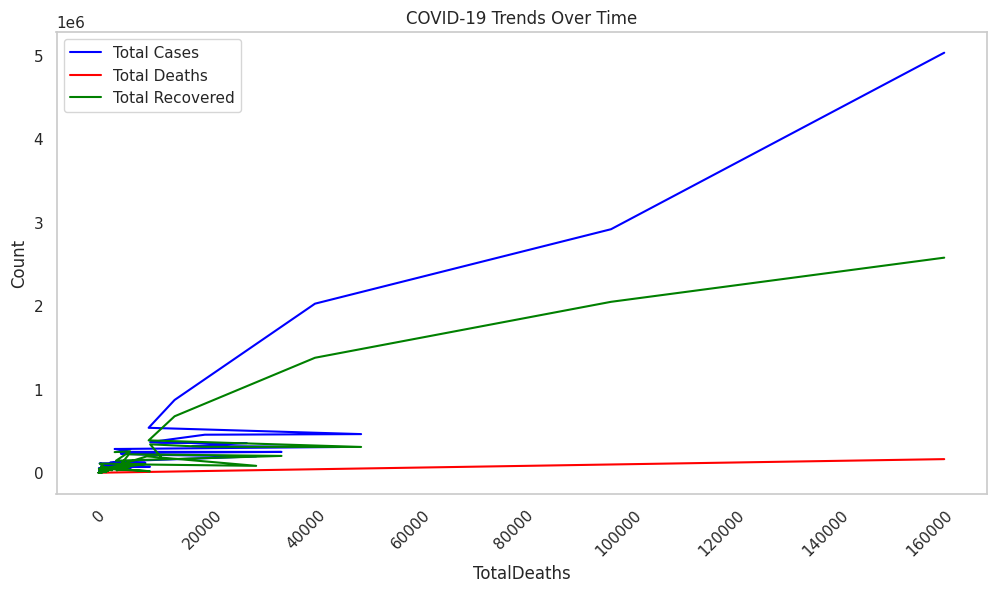

In [106]:
plt.figure(figsize=(12, 6))
plt.plot(df['TotalDeaths'], df['TotalCases'], label='Total Cases', color='blue')
plt.plot(df['TotalDeaths'], df['TotalDeaths'], label='Total Deaths', color='red')
plt.plot(df['TotalDeaths'], df['TotalRecovered'], label='Total Recovered', color='green')
plt.title('COVID-19 Trends Over Time')
plt.xlabel('TotalDeaths')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()


**Comparative Analysis**

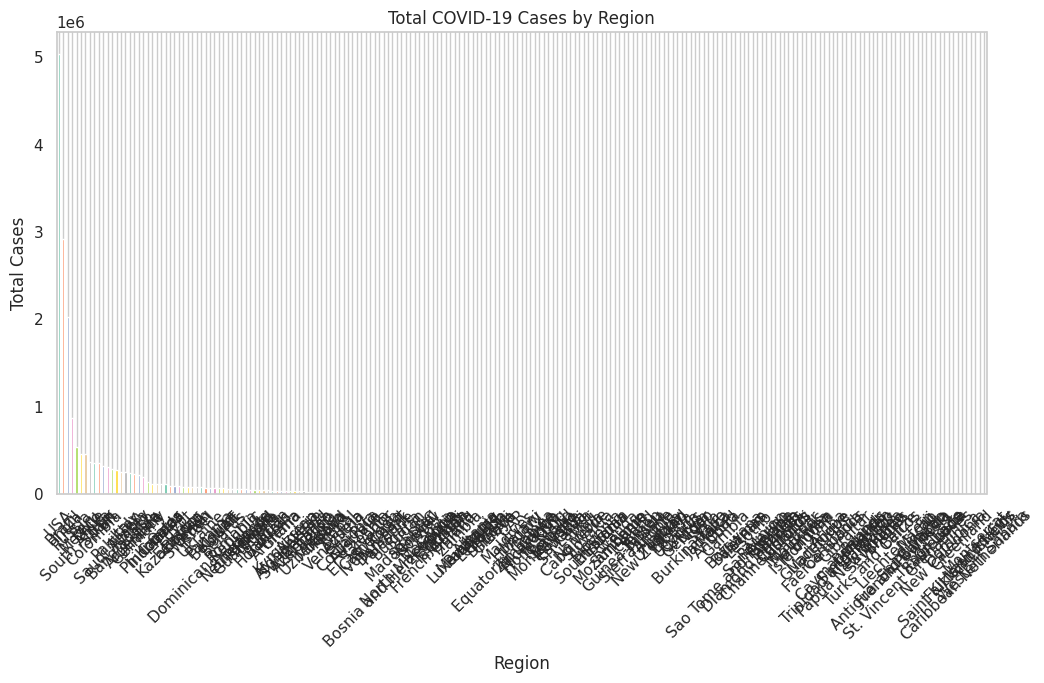

In [107]:
region_data = df.groupby('Country/Region')['TotalCases'].sum().sort_values(ascending=False)
region_data.plot(kind='bar', figsize=(12, 6), color=sns.color_palette('Set2'))
plt.title('Total COVID-19 Cases by Region')
plt.ylabel('Total Cases')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [108]:
Region = df.groupby(by='WHO Region').sum()
Region

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop
WHO Region,,,,,,,,,,,,,,,
Africa,South AfricaNigeriaGhanaAlgeriaKenyaEthiopiaCa...,AfricaAfricaAfricaAfricaAfricaAfricaAfricaAfri...,1.118461e+09,852026,0.0,15538.0,0.0,604326.0,0.0,232162.0,1097.0,43191.0,679.28,6856722.0,596367.0
Americas,USABrazilMexicoPeruChileColombiaArgentinaCanad...,North AmericaSouth AmericaNorth AmericaSouth A...,1.018880e+09,10452852,7902.0,384637.0,899.0,6259733.0,5076.0,3808482.0,39973.0,146673.0,4932.00,92420577.0,1570567.0
EasternMediterranean,IranSaudi ArabiaPakistanIraqQatarEgyptOmanKuwa...,AsiaAsiaAsiaAsiaAsiaAfricaAsiaAsiaAsiaAsiaAsia...,7.320077e+08,1605866,0.0,42376.0,0.0,1340094.0,0.0,223396.0,7982.0,133235.0,1098.00,19885783.0,1851579.0
Europe,RussiaSpainUKItalyTurkeyGermanyFranceKazakhsta...,EuropeEuropeEuropeEuropeAsiaEuropeEuropeAsiaEu...,9.277339e+08,3544086,0.0,215564.0,0.0,2047446.0,0.0,566295.0,6676.0,233379.0,9868.00,108184582.0,7382226.0
South-EastAsia,IndiaBangladeshIndonesiaNepalMaldivesThailandS...,AsiaAsiaAsiaAsiaAsiaAsiaAsiaAsiaAsiaAsia,1.997513e+09,2426899,0.0,50624.0,0.0,1621081.0,0.0,755194.0,8958.0,13145.0,108.40,26922262.0,307222.0
WesternPacific,PhilippinesSingaporeJapanAustraliaS. KoreaMala...,AsiaAsiaAsiaAustralia/OceaniaAsiaAsiaAsiaAustr...,5.221449e+08,267114,20.0,3975.0,1.0,182319.0,42.0,80820.0,467.0,13092.0,64.70,13217093.0,744427.0


Text(0.5, 1.0, 'TotalCases')

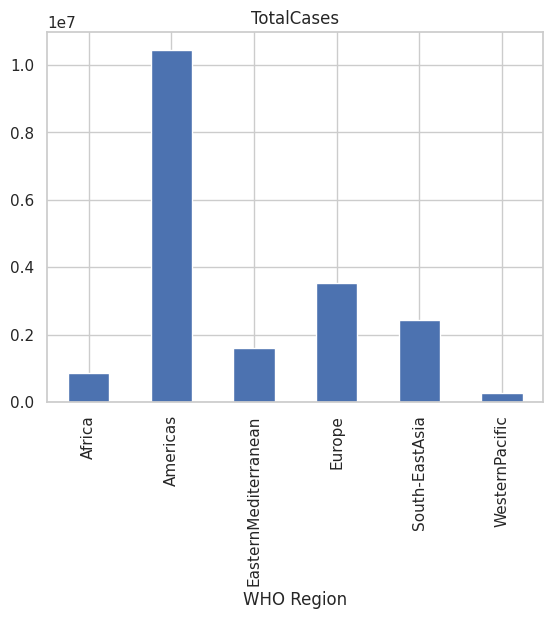

In [109]:
Region['TotalCases'].plot(kind='bar', ) 
plt.title('TotalCases')

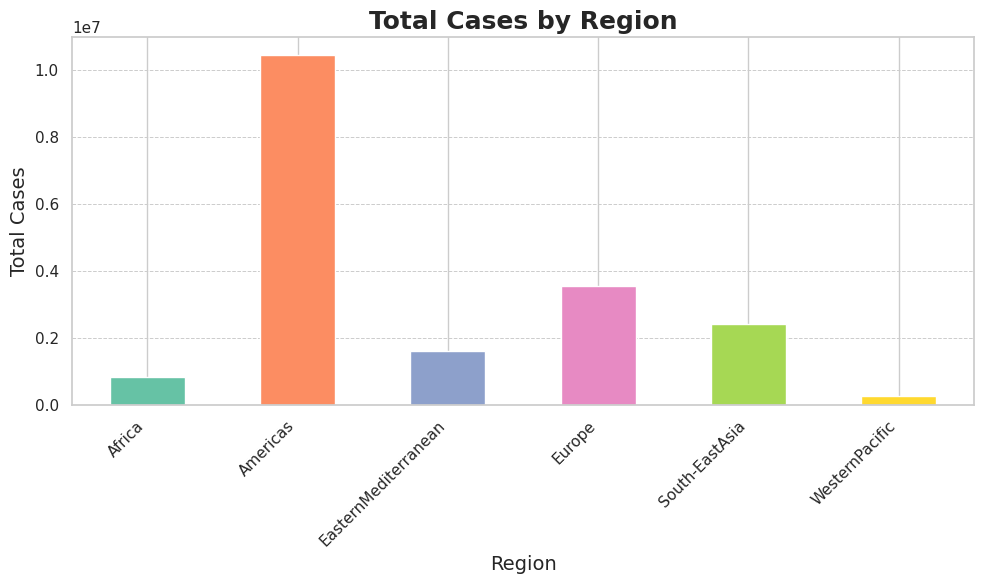

In [110]:
sns.set(style="whitegrid")

# Define figure size for better readability
plt.figure(figsize=(10, 6))

# Create a bar plot with a vibrant color palette
ax = Region['TotalCases'].plot(kind='bar', color=sns.color_palette('Set2'))

# Add a title with a larger font size and custom styling
plt.title('Total Cases by Region', fontsize=18, fontweight='bold')

# Label the x-axis and y-axis with custom fonts
plt.xlabel('Region', fontsize=14)
plt.ylabel('Total Cases', fontsize=14)

# Add gridlines for better data interpretation
plt.grid(True, which='major', axis='y', linestyle='--', linewidth=0.7)

# Rotate x-axis labels for better visibility if needed
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

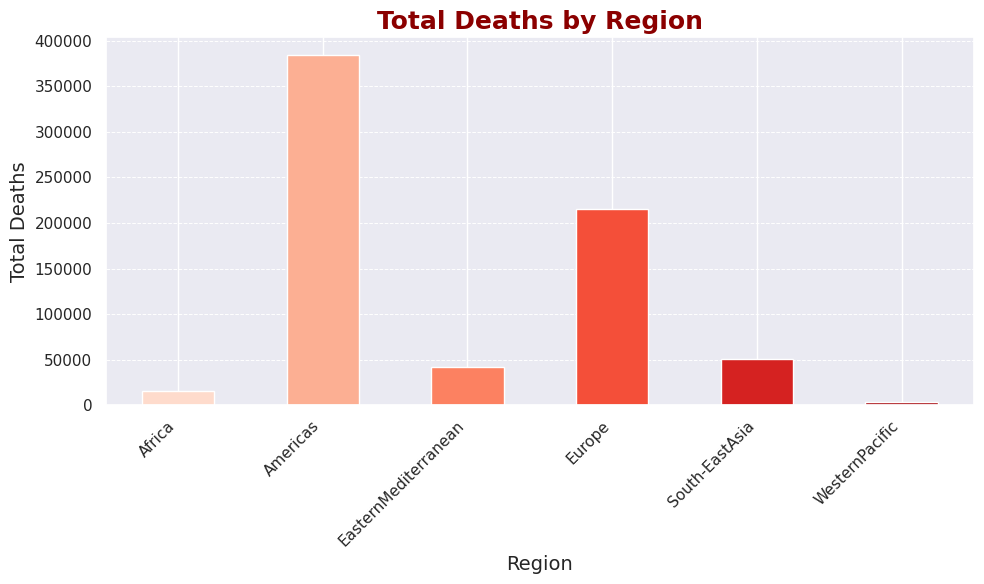

In [111]:
# Set a modern theme
sns.set(style="darkgrid")

# Define figure size for clarity and impact
plt.figure(figsize=(10, 6))

# Create a bar plot with a bold color palette
ax = Region['TotalDeaths'].plot(kind='bar', color=sns.color_palette('Reds', n_colors=len(Region)))

# Add a title with custom styling and larger font size
plt.title('Total Deaths by Region', fontsize=18, fontweight='bold', color='darkred')

# Label the x-axis and y-axis with clear, professional fonts
plt.xlabel('Region', fontsize=14)
plt.ylabel('Total Deaths', fontsize=14)

# Add gridlines to enhance readability, focusing on the y-axis
plt.grid(True, which='major', axis='y', linestyle='--', linewidth=0.7)

# Rotate the x-axis labels for better readability if necessary
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Display the plot
plt.show()

Text(0.5, 1.0, 'TotalRecovered')

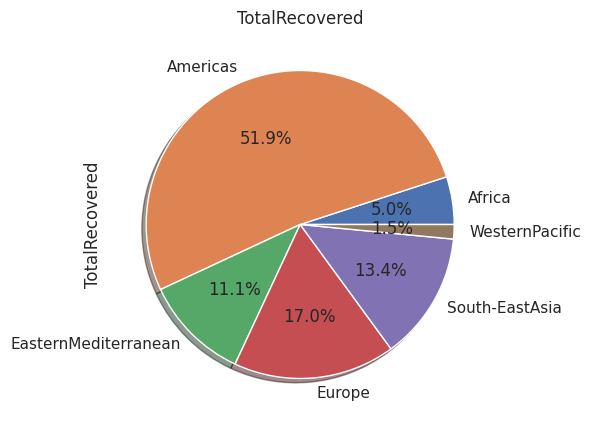

In [112]:
Region['TotalRecovered'].plot(kind='pie',  figsize=(10,5), shadow=True, autopct='%1.1f%%') 
plt.title('TotalRecovered')

Text(0.5, 1.0, 'ActiveCases')

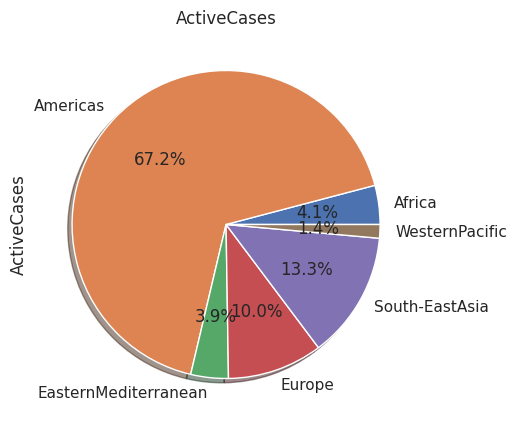

In [113]:
Region['ActiveCases'].plot(kind='pie', figsize=(10,5), shadow=True, autopct='%1.1f%%') # autopct create % ) 
plt.title('ActiveCases')

**Correlation Analysis**

In [115]:
print(df['Country/Region'].unique())  # Replace 'YourColumnName' with the relevant column


['USA' 'Brazil' 'India' 'Russia' 'South Africa' 'Mexico' 'Peru' 'Chile'
 'Colombia' 'Spain' 'Iran' 'UK' 'Saudi Arabia' 'Pakistan' 'Bangladesh'
 'Italy' 'Turkey' 'Argentina' 'Germany' 'France' 'Iraq' 'Philippines'
 'Indonesia' 'Canada' 'Qatar' 'Kazakhstan' 'Egypt' 'Ecuador' 'Bolivia'
 'Sweden' 'Oman' 'Israel' 'Ukraine' 'Dominican Republic' 'Panama'
 'Belgium' 'Kuwait' 'Belarus' 'UAE' 'Romania' 'Netherlands' 'Singapore'
 'Guatemala' 'Portugal' 'Poland' 'Nigeria' 'Honduras' 'Bahrain' 'Japan'
 'Armenia' 'Ghana' 'Kyrgyzstan' 'Afghanistan' 'Switzerland' 'Algeria'
 'Azerbaijan' 'Morocco' 'Uzbekistan' 'Serbia' 'Moldova' 'Ireland' 'Kenya'
 'Venezuela' 'Nepal' 'Austria' 'Costa Rica' 'Ethiopia' 'Australia'
 'El Salvador' 'Czechia' 'Cameroon' 'Ivory Coast' 'S. Korea' 'Denmark'
 'Palestine' 'Bosnia and Herzegovina' 'Bulgaria' 'Madagascar' 'Sudan'
 'North Macedonia' 'Senegal' 'Norway' 'DRC' 'Malaysia' 'French Guiana'
 'Gabon' 'Tajikistan' 'Guinea' 'Haiti' 'Finland' 'Zambia' 'Luxembourg'
 'Mauritania

In [116]:
df['Country/Region'] = pd.to_numeric(df['Country/Region'], errors='coerce')


In [117]:
df.dropna(subset=['Country/Region'], inplace=True)  # To drop rows with NaN


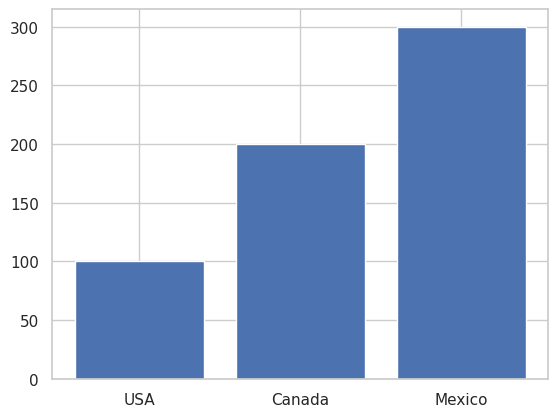

In [118]:
# Example DataFrame
data = {
    'Country': ['USA', 'Canada', 'Mexico'],
    'TotalCases': ['100', '200', '300']  # This is a string
}

df = pd.DataFrame(data)

# Convert 'TotalCases' to numeric
df['TotalCases'] = pd.to_numeric(df['TotalCases'], errors='coerce')

# Now you can safely plot or analyze
plt.bar(df['Country'], df['TotalCases'])
plt.show()
